<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.685930,-0.063035,62.622894,62.696211,-0.073317
1,0.0,1.0,20.807176,0.160316,30.967492,30.802519,0.164973
2,0.0,2.0,77.410231,0.400839,87.811070,87.432098,0.378972
3,0.0,3.0,59.644264,0.444986,70.089250,69.657807,0.431444
4,0.0,4.0,96.163432,0.091607,106.255039,106.194087,0.060952
...,...,...,...,...,...,...,...
119995,999.0,115.0,20.919489,-0.068472,30.851017,30.891045,-0.040028
119996,999.0,116.0,91.552176,-0.118205,101.433972,101.523427,-0.089456
119997,999.0,117.0,29.067255,-0.018270,39.048985,39.038776,0.010209
119998,999.0,118.0,56.988277,-0.006555,66.981722,66.959677,0.022045


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    52.685930 -0.063035   62.622894   62.696211 -0.073317
      1.0    20.807176  0.160316   30.967492   30.802519  0.164973
      2.0    77.410231  0.400839   87.811070   87.432098  0.378972
      3.0    59.644264  0.444986   70.089250   69.657807  0.431444
      4.0    96.163432  0.091607  106.255039  106.194087  0.060952
...                ...       ...         ...         ...       ...
999.0 115.0  20.919489 -0.068472   30.851017   30.891045 -0.040028
      116.0  91.552176 -0.118205  101.433972  101.523427 -0.089456
      117.0  29.067255 -0.018270   39.048985   39.038776  0.010209
      118.0  56.988277 -0.006555   66.981722   66.959677  0.022045
      119.0  55.448965 -0.119649   65.329316   65.420372 -0.091056

[120000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    52.685930 -0.063035   62.622894   62.696211 -0.073317
      1.0    20.807176  0.160316   30.967492   30.802519  0.164973
      2.0    77.410231  0.400839   87.811070   87.432098  0.378972
      3.0    59.644264  0.444986   70.089250   69.657807  0.431444
      4.0    96.163432  0.091607  106.255039  106.194087  0.060952
...                ...       ...         ...         ...       ...
999.0 115.0  20.919489 -0.068472   30.851017   30.891045 -0.040028
      116.0  91.552176 -0.118205  101.433972  101.523427 -0.089456
      117.0  29.067255 -0.018270   39.048985   39.038776  0.010209
      118.0  56.988277 -0.006555   66.981722   66.959677  0.022045
      119.0  55.448965 -0.119649   65.329316   65.420372 -0.091056

[120000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.685930,-0.063035,62.622894,62.696211,-0.073317
1,0.0,1.0,20.807176,0.160316,30.967492,30.802519,0.164973
2,0.0,2.0,77.410231,0.400839,87.811070,87.432098,0.378972
3,0.0,3.0,59.644264,0.444986,70.089250,69.657807,0.431444
4,0.0,4.0,96.163432,0.091607,106.255039,106.194087,0.060952
...,...,...,...,...,...,...,...
119995,999.0,115.0,20.919489,-0.068472,30.851017,30.891045,-0.040028
119996,999.0,116.0,91.552176,-0.118205,101.433972,101.523427,-0.089456
119997,999.0,117.0,29.067255,-0.018270,39.048985,39.038776,0.010209
119998,999.0,118.0,56.988277,-0.006555,66.981722,66.959677,0.022045


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    52.685930 -0.063035   62.622894   62.696211 -0.073317
      1.0    20.807176  0.160316   30.967492   30.802519  0.164973
      2.0    77.410231  0.400839   87.811070   87.432098  0.378972
      3.0    59.644264  0.444986   70.089250   69.657807  0.431444
      4.0    96.163432  0.091607  106.255039  106.194087  0.060952
...                ...       ...         ...         ...       ...
999.0 115.0  20.919489 -0.068472   30.851017   30.891045 -0.040028
      116.0  91.552176 -0.118205  101.433972  101.523427 -0.089456
      117.0  29.067255 -0.018270   39.048985   39.038776  0.010209
      118.0  56.988277 -0.006555   66.981722   66.959677  0.022045
      119.0  55.448965 -0.119649   65.329316   65.420372 -0.091056

[120000 rows x 5 columns]

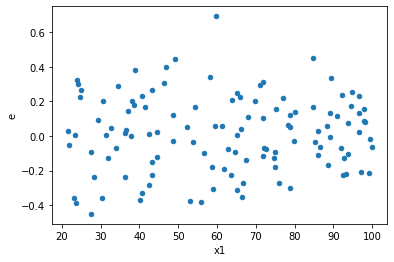

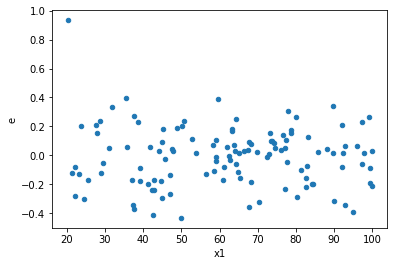

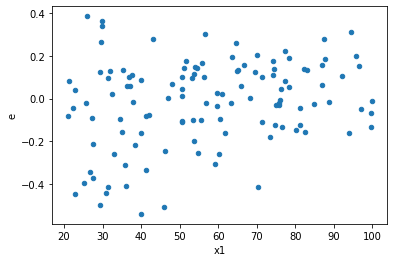

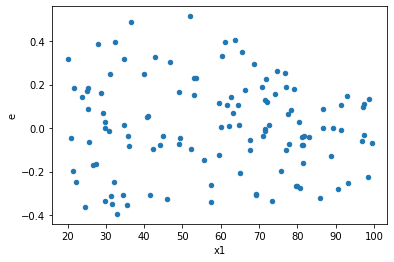

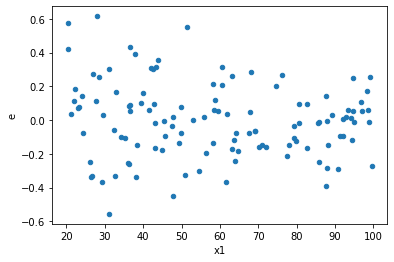

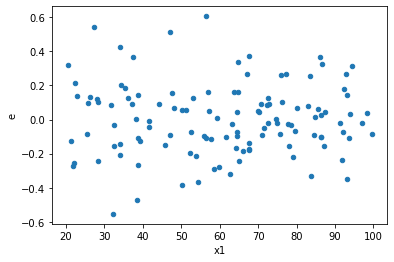

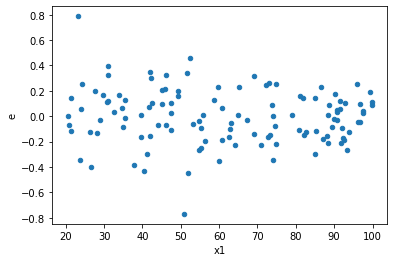

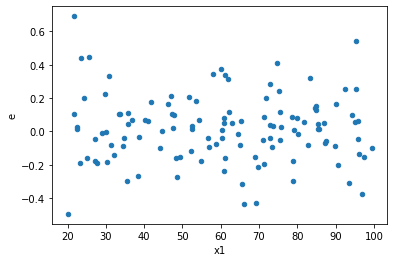

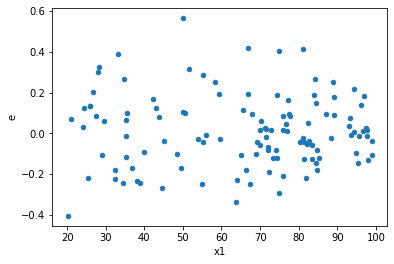

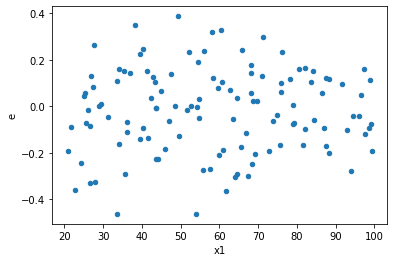

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,67.0,51.0,1.9922445192794898,3.541903088451126,0.029734992825067013,0.06944908016570835,2.3356010399693727,0.001938252879136959,0.9990308735604315,0.0009691264395684795,Reject005=0 : Heteroscedasticity
5.0,59.0,59.0,1.65231501392271,2.7112642863740377,0.028005339219028983,0.04595363197244132,1.6408882468103396,0.059504224725958954,0.9702478876370205,0.029752112362979477,Reject005=1 : Homoscedasticity
6.0,69.0,49.0,2.7899619804575364,2.8965264704081006,0.04043423160083386,0.0591127851103694,1.4619490162179893,0.16235776103660116,0.9188211194816994,0.08117888051830058,Reject005=1 : Homoscedasticity
8.0,65.0,53.0,1.8599779793223457,3.8056086973030667,0.028615045835728395,0.07180393768496353,2.5093071000889333,0.0007177715236610371,0.9996411142381695,0.00035888576183051857,Reject005=0 : Heteroscedasticity
9.0,52.0,66.0,1.9845392042811525,2.735726041758506,0.03816421546694524,0.04145039457209858,1.0861062926342495,0.7455504556574133,0.6272247721712934,0.37277522782870665,Reject005=1 : Homoscedasticity
10.0,64.0,54.0,2.0651353144945856,3.4965437898398606,0.0322677392889779,0.06475081092296038,2.0066733012522553,0.009435656683421056,0.9952821716582895,0.004717828341710528,Reject005=0 : Heteroscedasticity
11.0,72.0,46.0,2.040381357538741,2.892361819074198,0.028338629965815845,0.06287743084943909,2.218788661459164,0.00456405918049585,0.9977179704097521,0.002282029590247925,Reject005=0 : Heteroscedasticity
12.0,55.0,63.0,1.2583385864774246,3.226964051716173,0.02287888339049863,0.051221651614542424,2.2388178103051244,0.0021547053785784254,0.9989226473107108,0.0010773526892892127,Reject005=0 : Heteroscedasticity
13.0,67.0,51.0,2.2788502373117585,2.921110191965995,0.034012690109130723,0.057276670430705785,1.6839794278821196,0.05367294642388787,0.9731635267880561,0.026836473211943934,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,63.0,55.0,3.319898318672966,1.592025508933633,0.052696798709094696,0.028945918344247874,0.5492917796399696,0.021998654977048865,Reject005=0 : Heteroscedasticity
1.0,56.0,62.0,2.4635202298220147,2.4476263570399768,0.04399143267539312,0.03947784446838672,0.8973984720999755,0.6828634554257124,Reject005=1 : Homoscedasticity
2.0,67.0,51.0,1.9922445192794898,3.541903088451126,0.029734992825067013,0.06944908016570835,2.3356010399693727,0.001938252879136959,Reject005=0 : Heteroscedasticity
3.0,55.0,63.0,3.958830797515071,2.0965125800129565,0.0719787417730013,0.03327797746052312,0.46233063597404317,0.003997501585970298,Reject005=0 : Heteroscedasticity
4.0,51.0,67.0,2.75694704600385,2.06988549223605,0.05405778521576176,0.030893813316955968,0.5714960979930821,0.03855797913631153,Reject005=0 : Heteroscedasticity
5.0,59.0,59.0,1.65231501392271,2.7112642863740377,0.028005339219028983,0.04595363197244132,1.6408882468103396,0.059504224725958954,Reject005=1 : Homoscedasticity
6.0,69.0,49.0,2.7899619804575364,2.8965264704081006,0.04043423160083386,0.0591127851103694,1.4619490162179893,0.16235776103660116,Reject005=1 : Homoscedasticity
7.0,68.0,50.0,3.671414049732824,1.6145030386061845,0.05399138308430623,0.03229006077212369,0.598059522233456,0.04870082492030004,Reject005=0 : Heteroscedasticity
8.0,65.0,53.0,1.8599779793223457,3.8056086973030667,0.028615045835728395,0.07180393768496353,2.5093071000889333,0.0007177715236610371,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    621
Reject005=1 : Homoscedasticity      379
Name: Result_test, dtype: int64